Data Preparation

Steps:

    1. Summarize
    2. Clean
    3. Split

In [1]:
import env
import acquire
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import os
import prepare

In [2]:
df = acquire.get_titanic_data()

In [3]:
df.isna().sum()[df.isna().sum() > 0] / len(df)

age            0.198653
embarked       0.002245
deck           0.772166
embark_town    0.002245
dtype: float64

In [4]:
(df['embarked'].dropna() == df['embark_town'].dropna().apply(lambda x: x[0])).mean()

1.0

In [5]:
# embarked and embark_town are the same thing; we will keep
# embarked_town because its more descriptive yet represents the
# same info

In [6]:
df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [7]:
df.embark_town.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [8]:
# we can fill any null values with the most occurring value

df.embark_town.fillna('Southampton', inplace = True)

In [9]:
# now we will drop the useless and redundant column

df = df.drop(columns='embarked')

In [10]:
df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,First,C,Cherbourg,1


In [11]:
# we notice that passener_id is the same as the index
# this could be damaging, so we need to drop it

df = df.drop(columns='passenger_id')

In [12]:
# Also pclass vs class depicts the same info
# we want to keep pclass because its a number which we can 
# feed into algorithms

df = df.drop(columns='class')

In [13]:
df.parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

In [14]:
df = df.drop(columns='deck')

In [15]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,Southampton,0
1,1,1,female,38.0,1,0,71.2833,Cherbourg,0
2,1,3,female,26.0,0,0,7.9250,Southampton,1
3,1,1,female,35.0,1,0,53.1000,Southampton,0
4,0,3,male,35.0,0,0,8.0500,Southampton,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Southampton,1
887,1,1,female,19.0,0,0,30.0000,Southampton,1
888,0,3,female,NaN,1,2,23.4500,Southampton,0
889,1,1,male,26.0,0,0,30.0000,Cherbourg,1


Text(0, 0.5, 'Count of Passengers')

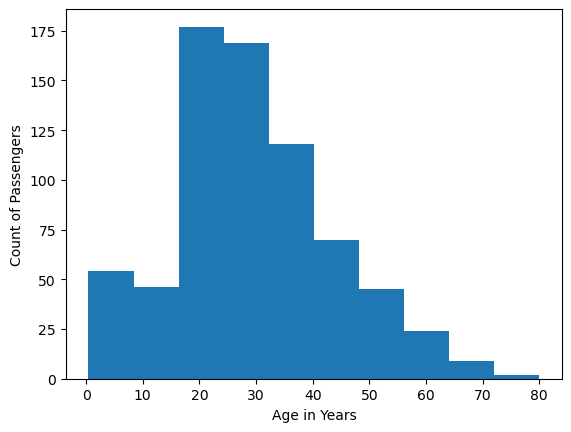

In [16]:
plt.hist(df['age'])
plt.xlabel('Age in Years')
plt.ylabel('Count of Passengers')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embark_town  891 non-null    object 
 8   alone        891 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 69.6+ KB


In [18]:
df['sex'].dtype == 'O'

True

In [19]:
df['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [20]:
df.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embark_town     object
alone            int64
dtype: object

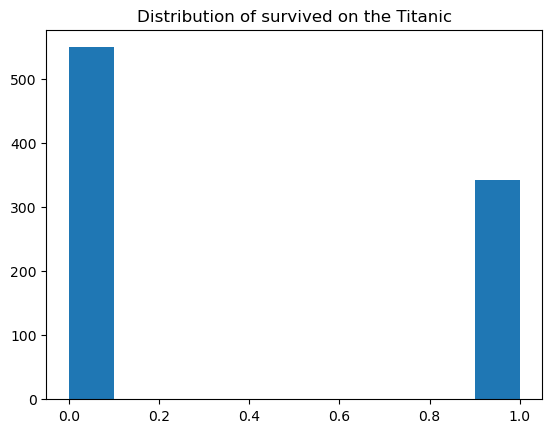

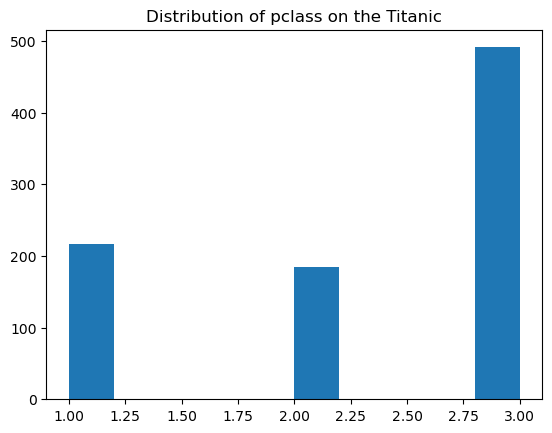

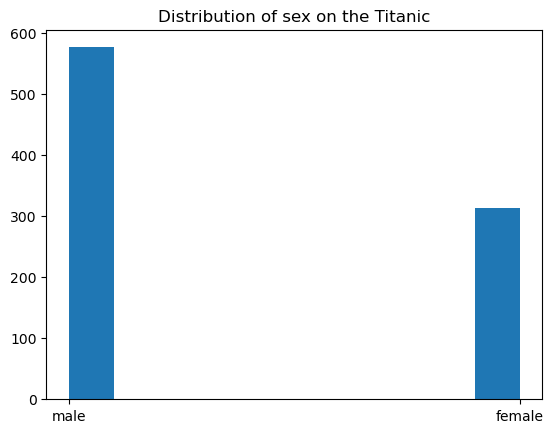

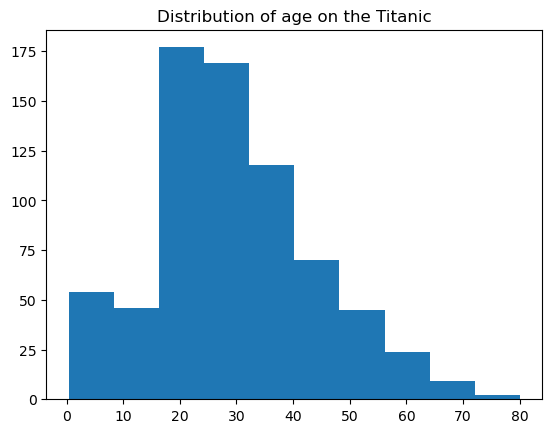

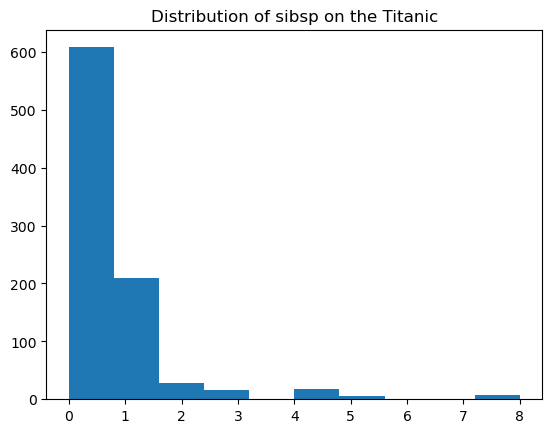

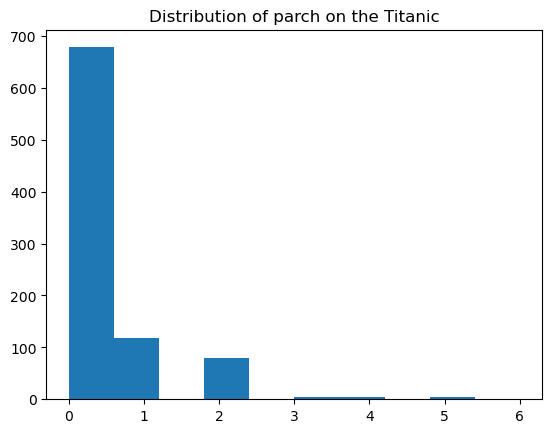

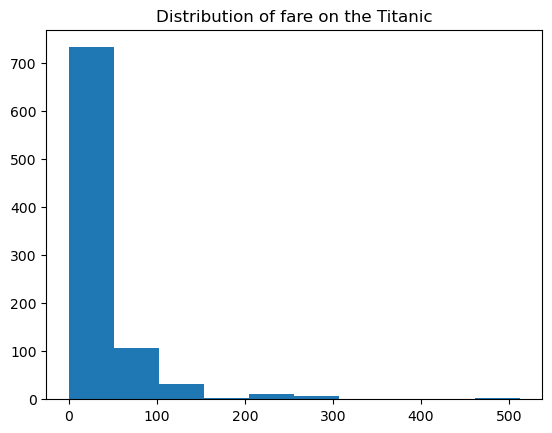

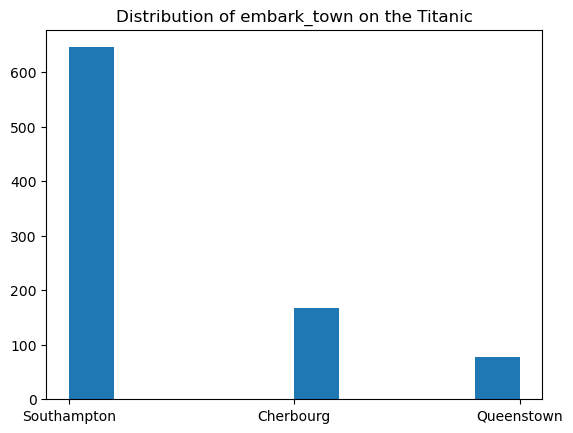

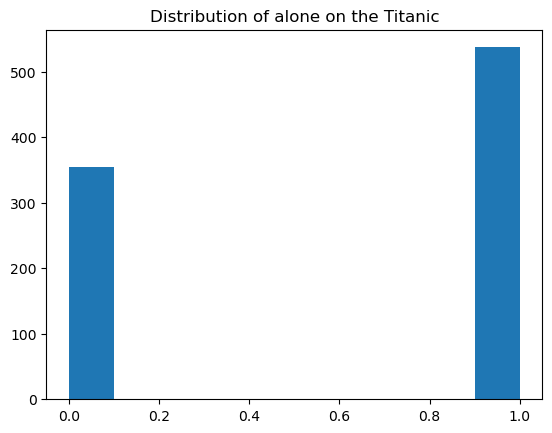

In [21]:
for col in df:
    if df[col].dtype != 'o':
        plt.hist(df[col])
        plt.title(f'Distribution of {col} on the Titanic')
        plt.show()

In [22]:
# What do we still need to do?
df
# we need to fill age with average age
len(df[df.age.isna()])
# we have 177 cell in age that are NaN

177

In [23]:
df['age'] = df.age.fillna(df.age.mean())

In [24]:
df.info()

# GREAT! We have no NaN values left

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embark_town  891 non-null    object 
 8   alone        891 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 69.6+ KB


In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.000000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.000000,3.0,3.0000
age,891.0,29.699118,13.002015,0.42,22.0000,29.699118,35.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.000000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.000000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.454200,31.0,512.3292
alone,891.0,0.602694,0.489615,0.00,0.0000,1.000000,1.0,1.0000


In [26]:
# Whats the deal with the max in fare? Why is granual? Why is it so
# much larger than the mean?

In [27]:
pd.get_dummies?

In [28]:
# One hot encoding? 

In [29]:
df['embark_town'].value_counts()

Southampton    646
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [30]:
pd.get_dummies(df['embark_town'], drop_first=True)
# we dropped the first row (n_options - 1) in order to assign meaning
# to a certain outcomes --> (0,0) = Cherbourg, (1,0) --> Queenstown,
# (0,1) --> Southamption

,Queenstown,Southampton
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [31]:
# Lets get this into our DF
df = pd.concat(
    [df, 
     pd.get_dummies(df['embark_town'], drop_first=True)], 
    axis=1)

In [32]:
df = pd.concat(
    [df, 
     pd.get_dummies(df['sex'], drop_first=True)], 
    axis=1)

In [33]:
import prepare

In [34]:
train, test, validate = prepare.split_data(prepare.prep_titanic(), 'survived')

In [35]:
train

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
474,0,3,female,22.000000,0,0,9.8375,Southampton,1,0,0,1
370,1,1,male,25.000000,1,0,55.4417,Cherbourg,0,1,0,0
573,1,3,female,29.699118,0,0,7.7500,Queenstown,1,0,1,0
110,0,1,male,47.000000,0,0,52.0000,Southampton,1,1,0,1
167,0,3,female,45.000000,1,4,27.9000,Southampton,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
735,0,3,male,28.500000,0,0,16.1000,Southampton,1,1,0,1
163,0,3,male,17.000000,0,0,8.6625,Southampton,1,1,0,1
770,0,3,male,24.000000,0,0,9.5000,Southampton,1,1,0,1
196,0,3,male,29.699118,0,0,7.7500,Queenstown,1,1,1,0


In [36]:
test

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
691,1,3,female,4.000000,0,1,13.4167,Cherbourg,0,0,0,0
762,1,3,male,20.000000,0,0,7.2292,Cherbourg,1,1,0,0
869,1,3,male,4.000000,1,1,11.1333,Southampton,0,1,0,1
174,0,1,male,56.000000,0,0,30.6958,Cherbourg,1,1,0,0
45,0,3,male,29.699118,0,0,8.0500,Southampton,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.000000,1,1,52.5542,Southampton,0,0,0,1
221,0,2,male,27.000000,0,0,13.0000,Southampton,1,1,0,1
134,0,2,male,25.000000,0,0,13.0000,Southampton,1,1,0,1
262,0,1,male,52.000000,1,1,79.6500,Southampton,0,1,0,1


In [37]:
validate

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
569,1,3,male,32.000000,0,0,7.8542,Southampton,1,1,0,1
532,0,3,male,17.000000,1,1,7.2292,Cherbourg,0,1,0,0
223,0,3,male,29.699118,0,0,7.8958,Southampton,1,1,0,1
35,0,1,male,42.000000,1,0,52.0000,Southampton,0,1,0,1
93,0,3,male,26.000000,1,2,20.5750,Southampton,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,3,male,20.000000,0,0,7.8542,Southampton,1,1,0,1
258,1,1,female,35.000000,0,0,512.3292,Cherbourg,1,0,0,0
186,1,3,female,29.699118,1,0,15.5000,Queenstown,0,0,1,0
108,0,3,male,38.000000,0,0,7.8958,Southampton,1,1,0,1


In [38]:
from sklearn.model_selection import train_test_split
# best split is 80/20 train/test

In [39]:
train_val, test = train_test_split(df, 
                                   train_size=.8, 
                                   random_state=1349, 
                                   stratify=df['survived'])

In [40]:
train_test_split?

In [41]:
train_val

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,Queenstown,Southampton,male
588,0,3,male,22.000000,0,0,8.0500,Southampton,1,0,1,1
726,1,2,female,30.000000,3,0,21.0000,Southampton,0,0,1,0
525,0,3,male,40.500000,0,0,7.7500,Queenstown,1,1,0,1
850,0,3,male,4.000000,4,2,31.2750,Southampton,0,0,1,1
557,0,1,male,29.699118,0,0,227.5250,Cherbourg,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
758,0,3,male,34.000000,0,0,8.0500,Southampton,1,0,1,1
17,1,2,male,29.699118,0,0,13.0000,Southampton,1,0,1,1
139,0,1,male,24.000000,0,0,79.2000,Cherbourg,1,0,0,1
391,1,3,male,21.000000,0,0,7.7958,Southampton,1,0,1,1


In [42]:
test

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,Queenstown,Southampton,male
691,1,3,female,4.000000,0,1,13.4167,Cherbourg,0,0,0,0
762,1,3,male,20.000000,0,0,7.2292,Cherbourg,1,0,0,1
869,1,3,male,4.000000,1,1,11.1333,Southampton,0,0,1,1
174,0,1,male,56.000000,0,0,30.6958,Cherbourg,1,0,0,1
45,0,3,male,29.699118,0,0,8.0500,Southampton,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.000000,1,1,52.5542,Southampton,0,0,1,0
221,0,2,male,27.000000,0,0,13.0000,Southampton,1,0,1,1
134,0,2,male,25.000000,0,0,13.0000,Southampton,1,0,1,1
262,0,1,male,52.000000,1,1,79.6500,Southampton,0,0,1,1


In [43]:
train, validate = train_test_split(train_val, 
                                   train_size=0.7,
                                  random_state=1349,
                                  stratify=train_val['survived'],
                                  )

In [44]:
train

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,Queenstown,Southampton,male
474,0,3,female,22.000000,0,0,9.8375,Southampton,1,0,1,0
370,1,1,male,25.000000,1,0,55.4417,Cherbourg,0,0,0,1
573,1,3,female,29.699118,0,0,7.7500,Queenstown,1,1,0,0
110,0,1,male,47.000000,0,0,52.0000,Southampton,1,0,1,1
167,0,3,female,45.000000,1,4,27.9000,Southampton,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
735,0,3,male,28.500000,0,0,16.1000,Southampton,1,0,1,1
163,0,3,male,17.000000,0,0,8.6625,Southampton,1,0,1,1
770,0,3,male,24.000000,0,0,9.5000,Southampton,1,0,1,1
196,0,3,male,29.699118,0,0,7.7500,Queenstown,1,1,0,1


In [45]:
train.shape[0] + validate.shape[0] + test.shape[0] == df.shape[0]

True

In [46]:
len(train) + len(test) + len(validate) == len(df)

True

# Data Preparation Exercises

Using the Iris Data:

1. Use the function defined in acquire.py to load the iris data.

2. Drop the species_id and measurement_id columns.

3. Rename the species_name column to just species.

4. Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.



In [47]:
iris_db = acquire.get_iris_data()

In [48]:
iris_db.info()
# great, so we do not have any null values in any of our series

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species_id      150 non-null    int64  
 1   measurement_id  150 non-null    int64  
 2   sepal_length    150 non-null    float64
 3   sepal_width     150 non-null    float64
 4   petal_length    150 non-null    float64
 5   petal_width     150 non-null    float64
 6   species_name    150 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 9.4+ KB


In [49]:
iris_db

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa
5,1,6,5.4,3.9,1.7,0.4,setosa
6,1,7,4.6,3.4,1.4,0.3,setosa
7,1,8,5.0,3.4,1.5,0.2,setosa
8,1,9,4.4,2.9,1.4,0.2,setosa
9,1,10,4.9,3.1,1.5,0.1,setosa


In [50]:
iris_db.species_name.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species_name, dtype: int64

In [51]:
titanic_df = acquire.get_titanic_data()

In [52]:
titanic_df.columns[titanic_df.dtypes == 'object']

Index(['sex', 'embarked', 'class', 'deck', 'embark_town'], dtype='object')

In [53]:
prepare.prep_telco()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,internet_service_type,payment_type,gender_Male,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,Female,0,1,1,9,1,0,0,1,0,...,DSL,Mailed check,0,1,0,0,0,0,0,1
1,Male,0,0,0,9,1,1,0,0,0,...,DSL,Mailed check,1,0,0,0,0,0,0,1
2,Male,0,0,0,4,1,0,0,0,1,...,Fiber optic,Electronic check,1,0,0,1,0,0,1,0
3,Male,1,1,0,13,1,0,0,1,1,...,Fiber optic,Electronic check,1,0,0,1,0,0,1,0
4,Female,1,1,0,3,1,0,0,0,0,...,Fiber optic,Mailed check,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,0,0,0,13,1,0,1,0,0,...,DSL,Mailed check,0,1,0,0,0,0,0,1
7039,Male,0,1,0,22,1,1,0,0,0,...,Fiber optic,Electronic check,1,0,0,1,0,0,1,0
7040,Male,0,0,0,2,1,0,0,1,0,...,DSL,Mailed check,1,0,0,0,0,0,0,1
7041,Male,0,1,1,67,1,0,1,0,1,...,DSL,Mailed check,1,0,1,0,0,0,0,1


In [54]:
prepare.prep_iris()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0
5,5.4,3.9,1.7,0.4,setosa,0,0
6,4.6,3.4,1.4,0.3,setosa,0,0
7,5.0,3.4,1.5,0.2,setosa,0,0
8,4.4,2.9,1.4,0.2,setosa,0,0
9,4.9,3.1,1.5,0.1,setosa,0,0


In [55]:
prepare.prep_titanic()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,male,22.000000,1,0,7.2500,Southampton,0,1,0,1
1,1,1,female,38.000000,1,0,71.2833,Cherbourg,0,0,0,0
2,1,3,female,26.000000,0,0,7.9250,Southampton,1,0,0,1
3,1,1,female,35.000000,1,0,53.1000,Southampton,0,0,0,1
4,0,3,male,35.000000,0,0,8.0500,Southampton,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,Southampton,1,1,0,1
887,1,1,female,19.000000,0,0,30.0000,Southampton,1,0,0,1
888,0,3,female,29.699118,1,2,23.4500,Southampton,0,0,0,1
889,1,1,male,26.000000,0,0,30.0000,Cherbourg,1,1,0,0


In [57]:
iris_train, iris_test, iris_validate = prepare.split_data(prepare.prep_iris(), 'species')

In [58]:
iris_train

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
138,6.0,3.0,4.8,1.8,virginica,0,1
7,5.0,3.4,1.5,0.2,setosa,0,0
79,5.7,2.6,3.5,1.0,versicolor,1,0
74,6.4,2.9,4.3,1.3,versicolor,1,0
97,6.2,2.9,4.3,1.3,versicolor,1,0
94,5.6,2.7,4.2,1.3,versicolor,1,0
83,6.0,2.7,5.1,1.6,versicolor,1,0
13,4.3,3.0,1.1,0.1,setosa,0,0
85,6.0,3.4,4.5,1.6,versicolor,1,0
42,4.4,3.2,1.3,0.2,setosa,0,0


In [60]:
iris_test

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
24,4.8,3.4,1.9,0.2,setosa,0,0
117,7.7,3.8,6.7,2.2,virginica,0,1
17,5.1,3.5,1.4,0.3,setosa,0,0
31,5.4,3.4,1.5,0.4,setosa,0,0
114,5.8,2.8,5.1,2.4,virginica,0,1
70,5.9,3.2,4.8,1.8,versicolor,1,0
142,5.8,2.7,5.1,1.9,virginica,0,1
131,7.9,3.8,6.4,2.0,virginica,0,1
55,5.7,2.8,4.5,1.3,versicolor,1,0
84,5.4,3.0,4.5,1.5,versicolor,1,0


In [61]:
iris_validate

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
5,5.4,3.9,1.7,0.4,setosa,0,0
28,5.2,3.4,1.4,0.2,setosa,0,0
33,5.5,4.2,1.4,0.2,setosa,0,0
46,5.1,3.8,1.6,0.2,setosa,0,0
113,5.7,2.5,5.0,2.0,virginica,0,1
57,4.9,2.4,3.3,1.0,versicolor,1,0
68,6.2,2.2,4.5,1.5,versicolor,1,0
65,6.7,3.1,4.4,1.4,versicolor,1,0
62,6.0,2.2,4.0,1.0,versicolor,1,0
10,5.4,3.7,1.5,0.2,setosa,0,0


In [65]:
titanic_train, titanic_test, titanic_validate = prepare.split_data(prepare.prep_titanic(), 'alone')

In [68]:
telco_train, telco_test, telco_validate = prepare.split_data(prepare.prep_telco(), 'gender')